# Importing Libraries
In this section, we import the necessary libraries to handle file operations, numerical computations, data processing, visualization, and image handling.

In [1]:
import os  # For working with file paths
import numpy as np  # For linear algebra operations
import pandas as pd  # For data processing and manipulation
import matplotlib.pyplot as plt  # For data visualization
from PIL import Image  # For loading image data

# Loading the Dataset
Here, we initialize the `MangoDataset` and create a DataFrame that contains the image tags and filenames.

In [2]:
from dataset import MangoDataset

dataset = MangoDataset()
image_df = pd.DataFrame(dataset.train, columns=["tag", "filename"])
print(image_df)

         tag              filename
0       Ripe                 1.jpg
1       Ripe                10.jpg
2       Ripe              1000.jpg
3       Ripe               102.jpg
4       Ripe               103.jpg
...      ...                   ...
1984  Rotten  rottenMango (95).jpg
1985  Rotten  rottenMango (96).jpg
1986  Rotten  rottenMango (97).jpg
1987  Rotten  rottenMango (98).jpg
1988  Rotten  rottenMango (99).jpg

[1989 rows x 2 columns]


# Image Loading and Preprocessing
In this section, we define functions to load and preprocess images from the dataset.

In [8]:
def load_image(use, image):
    image_path = os.path.join(dataset.path, "Dataset", use, image["tag"], image["filename"])
    img = Image.open(image_path)
    return img

def preprocess_image(image, size=(128, 128)):
    img = load_image("train", image)
    img = img.resize(size)
    return np.array(img)
 
processed_images = [preprocess_image(image) for image in dataset.train]

# Visualizing Sample Images
Finally, we visualize a few randomly selected processed images using matplotlib.

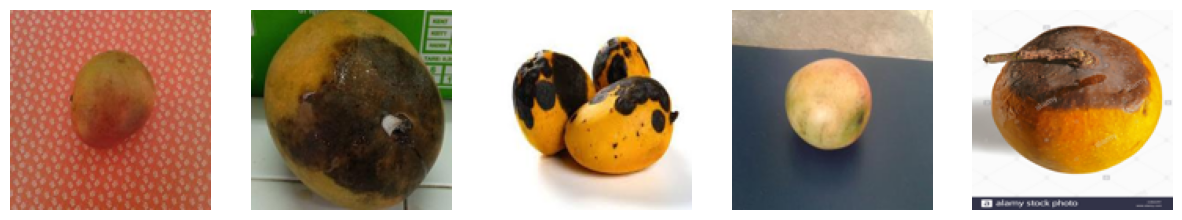

In [13]:
from random import shuffle
shuffle(processed_images)

fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for ax, img in zip(axes, processed_images[:5]):
    ax.imshow(img)
    ax.axis('off')
plt.show()